### **MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

#### **Curso: TC4029 - Ciencia y analítica de datos**


Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

**NÚMERO DE EQUIPO:** 83
        
**MIEMBROS DEL EQUIPO:**
- Gustavo Alejandro Garduño Macedo: A01795341
- Julia Gabriela Pinedo: A01795315
- Juan Manuel Rodríguez Mateos: A01794890

In [1]:
# Importar Librerías

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


# Opciones adicionales de pandas
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 50)
pd.set_option("display.max_colwidth", 500)

In [2]:
# Cargar el DataFrame

cars_df = pd.read_csv('../data/vehicles.csv')
cars_df.head(n = 5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville-2017-hyundai-elantra-se/7218891961.html,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-key-2005-excursion/7221797935.html,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-brookfield-2002-honda-odyssey-ex/7222270760.html,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinity-1965-chevrolet-truck/7210384030.html,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [3]:
# Obtener descripción de las columnas que forman parte del DataFrame

cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`.


In [ ]:
# Guardar el nombre de las columnas en una lista

columns_to_remove = ['id', 'VIN', 'url', 'image_url', 'description', 'posting_date']

# Eliminar las columnas del DataFrame
cars_df.drop(columns=columns_to_remove, axis=1, inplace=True)

# Imprimir el DataFrame después de los cambios
cars_df

,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state,lat,long
0,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN
1,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN
2,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN
3,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN
4,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,NaN,wy,33.786500,-84.445400
426876,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,NaN,wy,33.786500,-84.445400
426877,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,NaN,wy,33.779214,-84.411811
426878,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,NaN,wy,33.786500,-84.445400


1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [ ]:
# Obtener el número total de elementos y columnas
num_elements, num_columns = cars_df.shape

print('****************************************')
print(f'El número total de elementos es: {num_elements}')
print('****************************************')
print(f'El número total de columnas es: {num_columns}')
print('****************************************')

****************************************
El número total de elementos es: 426880
****************************************
El número total de columnas es: 20
****************************************


## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/10

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [ ]:
# Importar Librerías

from tabulate import tabulate

# Para determinar el porcentaje de valores faltantes, se utilizará una función que los
# imprimirá en una tabla

missing_percentage = cars_df.isna().sum() * 100 / len(cars_df)

# Guardar en un DataFrame para su impresión en una tabla

df_missing = pd.DataFrame({
    'Columna': cars_df.columns,
    'Porcentaje Faltantes': missing_percentage.astype(str) + '%' # Imprime el valor con el símbolo "%"
})

# Imprimir una tabla con los datos

print(tabulate(df_missing, headers='keys', tablefmt='psql', showindex=False))

+--------------+------------------------+
| Columna      | Porcentaje Faltantes   |
|--------------+------------------------|
| region       | 0.0%                   |
| region_url   | 0.0%                   |
| price        | 0.0%                   |
| year         | 0.28228073463268366%   |
| manufacturer | 4.133714392803598%     |
| model        | 1.2361787856071964%    |
| condition    | 40.78523238380809%     |
| cylinders    | 41.6224700149925%      |
| fuel         | 0.7058189655172413%    |
| odometer     | 1.0307346326836582%    |
| title_status | 1.9307533733133433%    |
| transmission | 0.5987631184407796%    |
| drive        | 30.586347451274364%    |
| size         | 71.7674756371814%      |
| type         | 21.752717391304348%    |
| paint_color  | 30.501077586206897%    |
| county       | 100.0%                 |
| state        | 0.0%                   |
| lat          | 1.5341547976011993%    |
| long         | 1.5341547976011993%    |
+--------------+------------------

In [ ]:
# Se creará una función para retornar los labels de las columnas que tengan determinado porcentaje
# de valores faltantes en el DataFrame anteriormente creado con los porcentajes por columna.

# Importar Librerías
import re

def filter_columns_by_percentage(df, column_keys, column_to_search, percentage, comparison='equal'):
    """
    Filtrar columnas por porcentaje de valores faltantes

    Args:
        df: DataFrame con los porcentajes de valores faltantes por columnas
        column_keys: Columna que contiene los labels de cada columna en el DataFrame
        column_to_search: Columna que contiene los porcentajes de valores faltantes de cada columna
        percentage: Porcentaje de valores faltantes a buscar
        comparison: Caso a analizar según lo indicado por el usuario
            equal = filtra porcentajes iguales al porcentaje de entrada
            greater_equal = filtra porcentajes mayores o iguales al porcentaje de entrada
            less_equal = filtra porcentajes menores o iguales al porcentaje de entrada

    Returns:
        filtered_columns: Una lista con los labels de las columnas que poseen el porcentaje deseado
    """
    df[column_to_search] = df[column_to_search].str.extract(r'(\d+\.*\d*)').astype(float).copy()

    if comparison == 'equal':
        filtered_columns = df[df[column_to_search] == percentage]

    elif comparison == 'greater_equal':
        filtered_columns = df[(df[column_to_search] >= percentage)]

    elif comparison == 'less_equal':
        filtered_columns = df[(df[column_to_search] <= percentage) & (df[column_to_search] > 0.0)]

    return filtered_columns[column_keys].tolist()

In [ ]:
# Se observa que las columnas que poseen el 30% o más de valores faltantes son las siguientes:

columns_more_than_30 = filter_columns_by_percentage(df=df_missing,
                                                    column_keys='Columna',
                                                    column_to_search='Porcentaje Faltantes',
                                                    percentage=30,
                                                    comparison='greater_equal')
print('Las columnas son:')
print(columns_more_than_30)

Las columnas son:
['condition', 'cylinders', 'drive', 'size', 'paint_color', 'county']


In [ ]:
# Confirmando visualmente con los datos obtenidos anteriormente en la Tabla.

# Por lo tanto, se utilizará la función anteriormente descrita para eliminar dichas columnas,
# aprovechando la variable definida "num_elements"

# Importar Librerías
import math

# Porcentaje de al menos el 70% de valores no-nulos
percentage_70 = math.floor(num_elements * 0.70) # Asegurar que el valor sea un entero

# Eliminar columnas que no contengan al menos el 70% de valores no-nulos
cars_df = cars_df.dropna(axis=1, thresh=percentage_70)
cars_df

,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state,lat,long
0,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN
1,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN
2,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN
3,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN
4,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,gas,32226.0,clean,other,sedan,wy,33.786500,-84.445400
426876,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,wy,33.786500,-84.445400
426877,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,wy,33.779214,-84.411811
426878,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,gas,30112.0,clean,other,sedan,wy,33.786500,-84.445400


In [ ]:
# Se observa que después de eliminar dichas columas, se tiene un total de 14 columnas, a comparación
# de las 20 que se encontraban originalmente.

# Para obtener el valor de columnas eliminadas, se utilizará la variable "num_columns" definida
# anteriormente, y se creará la variable "num_columns_after_drop" para realizar la comparación.

num_columns_after_drop = cars_df.shape[1]

# Ahora, se obtendrá el porcentaje de registros eliminados
columns_eliminated = num_columns-num_columns_after_drop

print(f'La cantidad de columnas eliminadas es: {columns_eliminated}')

La cantidad de columnas eliminadas es: 6


Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [ ]:
# Para determinar el porcentaje de valores faltantes después de haber eliminado las columnas
# anteriores, se utilizará una función que los imprimirá en una tabla

missing_percentage_changed = cars_df.isna().sum() * 100 / len(cars_df)

# Guardar en un DataFrame para su impresión en una tabla

df_missing_changed = pd.DataFrame({
    'Columna': cars_df.columns,
    'Porcentaje Faltantes': missing_percentage_changed.astype(str) + '%'
    # Imprime el valor con el símbolo "%"
})

# Imprimir una tabla con los datos

print(tabulate(df_missing_changed, headers='keys', tablefmt='psql', showindex=False))

+--------------+------------------------+
| Columna      | Porcentaje Faltantes   |
|--------------+------------------------|
| region       | 0.0%                   |
| region_url   | 0.0%                   |
| price        | 0.0%                   |
| year         | 0.28228073463268366%   |
| manufacturer | 4.133714392803598%     |
| model        | 1.2361787856071964%    |
| fuel         | 0.7058189655172413%    |
| odometer     | 1.0307346326836582%    |
| title_status | 1.9307533733133433%    |
| transmission | 0.5987631184407796%    |
| type         | 21.752717391304348%    |
| state        | 0.0%                   |
| lat          | 1.5341547976011993%    |
| long         | 1.5341547976011993%    |
+--------------+------------------------+


In [ ]:
# Se utilizará la función anteriormente declarada para guardar los labels de cada columna con menos del
# 5% de valores faltantes

columns_less_than_5 = filter_columns_by_percentage(df=df_missing_changed,
                                                   column_keys='Columna',
                                                   column_to_search='Porcentaje Faltantes',
                                                   percentage=5,
                                                   comparison='less_equal')
print('Las columnas son:')
print(columns_less_than_5)

Las columnas son:
['year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status', 'transmission', 'lat', 'long']


In [ ]:
# Ahora, teniendo los labels de las columnas que cumplen dicha condición, se eliminarán los registros
# que contienen NaN mediante el parámetro subset.

cars_df = cars_df.dropna(subset=columns_less_than_5)
cars_df

,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state,lat,long
27,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al,32.590000,-85.480000
28,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al,32.590000,-85.480000
29,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al,32.590000,-85.480000
30,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al,32.590000,-85.480000
31,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al,32.592000,-85.518900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,gas,32226.0,clean,other,sedan,wy,33.786500,-84.445400
426876,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,wy,33.786500,-84.445400
426877,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,wy,33.779214,-84.411811
426878,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,gas,30112.0,clean,other,sedan,wy,33.786500,-84.445400


In [ ]:
# Se reinicia el index del DataFrame para mantener la continuidad entre las columnas
cars_df = cars_df.reset_index(drop=True)
cars_df

,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state,lat,long
0,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al,32.590000,-85.480000
1,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al,32.590000,-85.480000
2,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al,32.590000,-85.480000
3,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al,32.590000,-85.480000
4,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al,32.592000,-85.518900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383484,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,gas,32226.0,clean,other,sedan,wy,33.786500,-84.445400
383485,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,wy,33.786500,-84.445400
383486,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,wy,33.779214,-84.411811
383487,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,gas,30112.0,clean,other,sedan,wy,33.786500,-84.445400


In [ ]:
# Se observa que después de eliminar dichos registros, se tiene un total de 383489 filas, a comparación
# de las 426880 que se encontraban originalmente.

# Para obtener el porcentaje, se utilizará la variable "num_elements" definida anteriormente, y
# se creará la variable "num_elements_after_drop" para realizar la comparación.

num_elements_after_drop = cars_df.shape[0]

# Ahora, se obtendrá el porcentaje de registros eliminados
percentage_eliminated = ((num_elements-num_elements_after_drop)/ num_elements) * 100

print(f'El porcentaje de registros iniciales eliminados es: {percentage_eliminated}%')

El porcentaje de registros iniciales eliminados es: 10.16468328335832%


2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [ ]:
# Para determinar las variables que aún poseen valores faltantes, se utilizará una función que los
# imprimirá en una tabla

missing_percentage_after_drop = cars_df.isna().sum() * 100 / len(cars_df)

# Guardar en un DataFrame para su impresión en una tabla

df_missing_after_drop = pd.DataFrame({
    'Columna': cars_df.columns,
    'Porcentaje Faltantes': missing_percentage_after_drop.astype(str) + '%'
    # Imprime el valor con el símbolo "%"
})

# Imprimir una tabla con los datos
print(tabulate(df_missing_after_drop, headers='keys', tablefmt='psql', showindex=False))

+--------------+------------------------+
| Columna      | Porcentaje Faltantes   |
|--------------+------------------------|
| region       | 0.0%                   |
| region_url   | 0.0%                   |
| price        | 0.0%                   |
| year         | 0.0%                   |
| manufacturer | 0.0%                   |
| model        | 0.0%                   |
| fuel         | 0.0%                   |
| odometer     | 0.0%                   |
| title_status | 0.0%                   |
| transmission | 0.0%                   |
| type         | 21.485622794917195%    |
| state        | 0.0%                   |
| lat          | 0.0%                   |
| long         | 0.0%                   |
+--------------+------------------------+


In [ ]:
# Se observa que la variable "type" aún posee valores faltantes, por lo que se procederá
# a hacer un análisis de dicha variable.

#### Analizando la variable `type`

In [ ]:
cars_df["type"].to_frame().dtypes

type    object
dtype: object

- La variable es de tipo objeto, por lo tanto, solo metodos para variables categóricas hacen sentido.

<AxesSubplot:xlabel='type'>

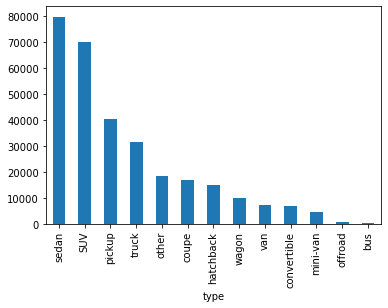

In [ ]:
cars_df.value_counts("type").sort_values(ascending=False).plot(kind="bar")

- Se observa que la categoría que tiene más frecuencia (moda) es el tipo de auto sedán. Por lo tanto , se puede hacer una imputación de valores faltantes por moda de la categoría.
- Otra alternativa sería hacer un modelo de regresión multinomial usando como variable de salida `type` e imputar la predicción de la categoría (un metodo más robusto) ,sin embargo, esto no es práctico sin antes observar la precisión del modelo usando la estrategia básica, que es imputación de moda

In [ ]:
cars_df["type"] = cars_df["type"].fillna(value = cars_df["type"].mode()[0])

Corroboramos que el DataFrame no tiene valores faltantes

In [ ]:
cars_df.isna().mean().to_frame("missing_pct")

,missing_pct
region,0.0
region_url,0.0
price,0.0
year,0.0
manufacturer,0.0
model,0.0
fuel,0.0
odometer,0.0
title_status,0.0
transmission,0.0


## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

<AxesSubplot:ylabel='Frequency'>

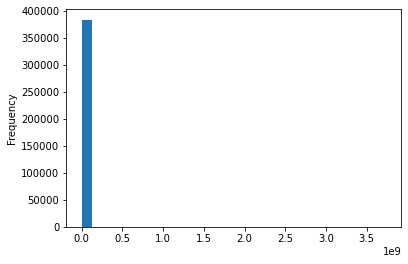

In [ ]:
cars_df["price"].plot(kind = 'hist', bins = 30)

In [ ]:
cars_df["price"].to_frame().describe()

,price
count,3.834890e+05
mean,6.478803e+04
std,1.153956e+07
min,0.000000e+00
25%,5.999000e+03
50%,1.399800e+04
75%,2.688800e+04
max,3.736929e+09


- Se observa un histograma extremadamente sesgado a la izquierda con valores atipicos que hacen que la cola de la distribución sea pesada.Esto confirmado por el hecho de que la media (64,788) es mucho mas grande que la mediana (13,998)
- Dicha media es "inflada" porque hay valores del precio  atípicos, ejemplo un máximo en el precio de 3,736,929,000. Lo cual es posiblemente un error en los datos, dado que un precio tan elevado no tiene sentido en el contexto de negocio


3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

In [ ]:
from datetime import date
cars_df['age'] = date.today().year - cars_df["year"]
cars_df.drop(columns=['year'],inplace=True)

In [ ]:
cars_df.head()

,region,region_url,price,manufacturer,model,fuel,odometer,title_status,transmission,type,state,lat,long,age
0,auburn,https://auburn.craigslist.org,33590,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al,32.590,-85.4800,9.0
1,auburn,https://auburn.craigslist.org,22590,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al,32.590,-85.4800,13.0
2,auburn,https://auburn.craigslist.org,39590,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al,32.590,-85.4800,3.0
3,auburn,https://auburn.craigslist.org,30990,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al,32.590,-85.4800,6.0
4,auburn,https://auburn.craigslist.org,15000,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al,32.592,-85.5189,10.0


<AxesSubplot:ylabel='Frequency'>

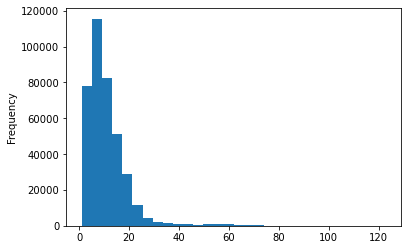

In [ ]:
cars_df['age'].plot(kind = "hist",bins = 30)

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

In [ ]:
cols = ['price','age','odometer']

for col in cols:
  sns.boxplot(cars_df, x = col)
  plt.xscale("log")
  plt.title(f"{col}")
  plt.show()

- Existen valores atípicos para las 3 variables. Incluso, se utilizó una transformación logaritmica base 10 en cada una de las variables dada la magnitud de los valores atípicos. Como se observó en los estadísticos descriptivos de `price`

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se eliminaron?

In [ ]:
def IQR(x):
  return x.quantile(0.75) - x.quantile(0.25)

def get_outliers(df, col_name):

    iqr = IQR(x = df[col_name])

    outlier_upper_limit = df[col_name].quantile(0.75) + 1.5 * iqr

    outlier_lower_limit = df[col_name].quantile(0.25) - 1.5 * iqr

    outliers = df.\
      query(f'{col_name} > @outlier_upper_limit or {col_name} < @outlier_lower_limit')[col_name].\
      to_list()

    print(f"Number of outliers for column {col_name}: {len(outliers)}")
    print(f"Percentaje of outliers for column {col_name} : {round(len(outliers)/len(df[col_name]) * 100,2)} %")
    print("------------------------")

    return outliers

In [ ]:
price_outliers = get_outliers(cars_df,"price")
age_outliers = get_outliers(cars_df,"age")
odometer_outliers = get_outliers(cars_df,"odometer")

Number of outliers for column price: 6285
Percentaje of outliers for column price : 1.64 %
------------------------
Number of outliers for column age: 12023
Percentaje of outliers for column age : 3.14 %
------------------------
Number of outliers for column odometer: 3118
Percentaje of outliers for column odometer : 0.81 %
------------------------


In [ ]:
def remove_outliers(df,cols):
  df_without_outliers = df

  for idx, col in enumerate(cols):

    df_without_outliers = df_without_outliers.query(f"{col} not in @{col}_outliers")

  return df_without_outliers

cars_df_without_outliers = remove_outliers(cars_df,cols)

print(f"Rows without outliers: { cars_df_without_outliers.shape[0]}")
print(f"Rows removed: {cars_df.shape[0] - cars_df_without_outliers.shape[0]}")
print(f"Percentaje removed: {round((cars_df.shape[0] - cars_df_without_outliers.shape[0])/cars_df.shape[0],2)} %")

Rows without outliers: 362763
Rows removed: 20726
Percentaje removed: 0.05 %


4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

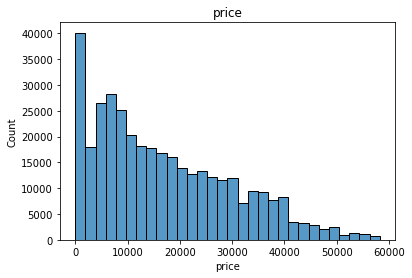

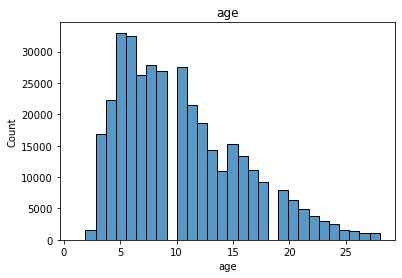

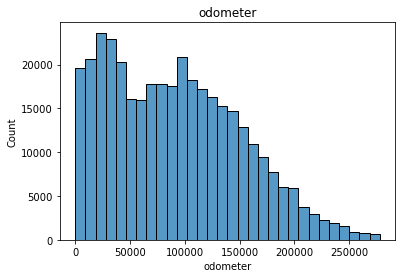

In [ ]:
cols = ['price','age','odometer']

for col in cols:
  sns.histplot(cars_df_without_outliers, x = col, bins = 30)
  plt.title(f"{col}")
  plt.show()

In [ ]:
# Reset Index

cars_df_without_outliers.reset_index(drop=True)

,region,region_url,price,manufacturer,model,fuel,odometer,title_status,transmission,type,state,lat,long,age
0,auburn,https://auburn.craigslist.org,33590,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al,32.590000,-85.480000,9.0
1,auburn,https://auburn.craigslist.org,22590,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al,32.590000,-85.480000,13.0
2,auburn,https://auburn.craigslist.org,39590,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al,32.590000,-85.480000,3.0
3,auburn,https://auburn.craigslist.org,30990,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al,32.590000,-85.480000,6.0
4,auburn,https://auburn.craigslist.org,15000,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al,32.592000,-85.518900,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362758,wyoming,https://wyoming.craigslist.org,23590,nissan,maxima s sedan 4d,gas,32226.0,clean,other,sedan,wy,33.786500,-84.445400,4.0
362759,wyoming,https://wyoming.craigslist.org,30590,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,wy,33.786500,-84.445400,3.0
362760,wyoming,https://wyoming.craigslist.org,34990,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,wy,33.779214,-84.411811,3.0
362761,wyoming,https://wyoming.craigslist.org,28990,lexus,es 350 sedan 4d,gas,30112.0,clean,other,sedan,wy,33.786500,-84.445400,5.0


# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


In [ ]:
# Importar Librerías

from scipy import stats

# Se creará una función para generar un gráfico Q-Q por columna

def create_QQ_graph_for_each_column(df, column_name):
    """
    Generar un gráfico Q-Q para cada columna

    Args:
        df (DataFrame)
        col_name (str)

    Returns:
        gráfico Q-Q (graph): gráfica cuantil-cuantil
    """
    plt.figure(figsize=(10, 7)) # Definir tamaño de la figura
    stats.probplot(df[column_name], plot=plt, dist='norm') # Generar gráfico Q-Q
    plt.title(f'Gráfico Q-Q para la columna {column_name}')
    plt.show()

*************************************************************************************




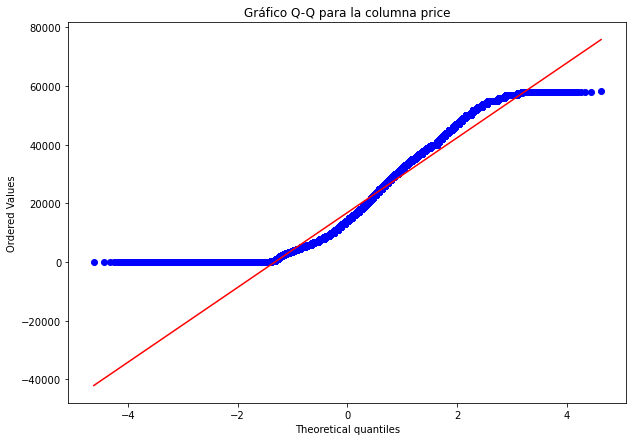



*************************************************************************************




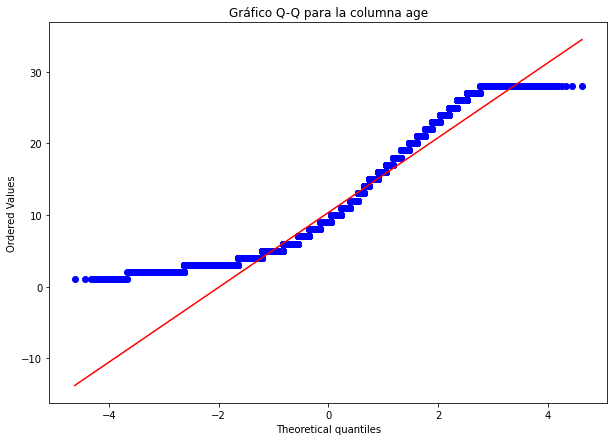



*************************************************************************************




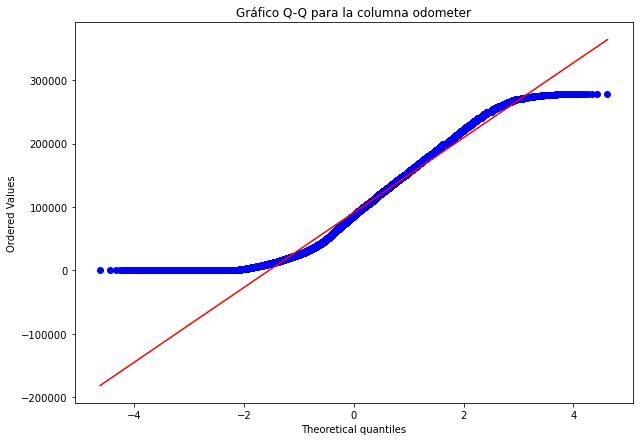

In [ ]:
# Imprimir histogramas

columns_for_QQ = ['price', 'age', 'odometer']

# Ciclo for para obtener los gráficos por columnas

for column_name in columns_for_QQ:
    print('*************************************************************************************')
    print('\n')
    create_QQ_graph_for_each_column(df=cars_df_without_outliers,
                                    column_name=column_name)
    print('\n')

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Házlo en una copia del dataframe a la que denominarás `transf_df`.

In [ ]:
# Importar Librerías

from scipy.stats import yeojohnson

# Guardar las columnas a las que se le hará la transformación en una lista
columns_for_QQ = ['price', 'age', 'odometer']

# Se crea una copia del DataFrame original en "transf_df"
transf_df = cars_df_without_outliers.copy()

for column in columns_for_QQ:
    transf_df[column], _ = yeojohnson(cars_df_without_outliers[column])

# Create a new DataFrame with only the transformed columns
transf_df = transf_df[columns_for_QQ]
transf_df

,price,age,odometer
0,200.649506,2.548443,630.213889
1,168.919447,2.965289,703.454883
2,215.458418,1.473022,349.724058
3,193.762316,2.119644,525.245099
4,141.363555,2.665289,960.521485
...,...,...,...
383484,172.127410,1.727105,461.325125
383485,192.673806,1.473022,272.828844
383486,204.232140,1.473022,154.862040
383487,188.236378,1.938386,444.958581


5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

*************************************************************************************




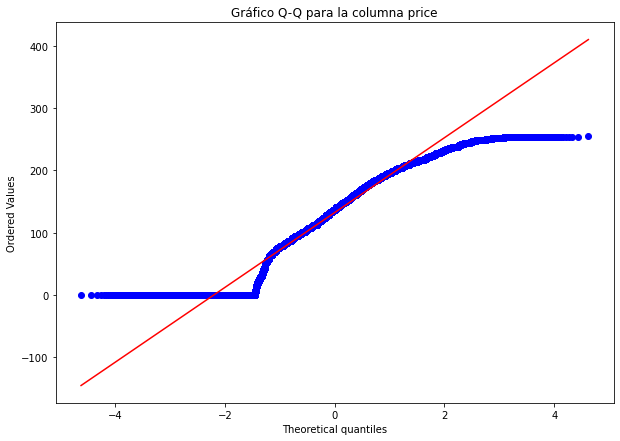



*************************************************************************************




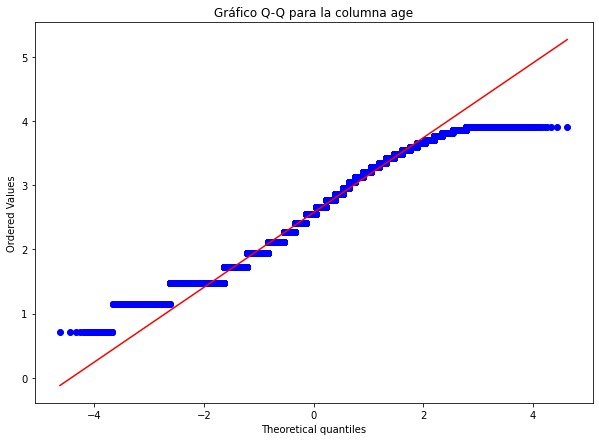



*************************************************************************************




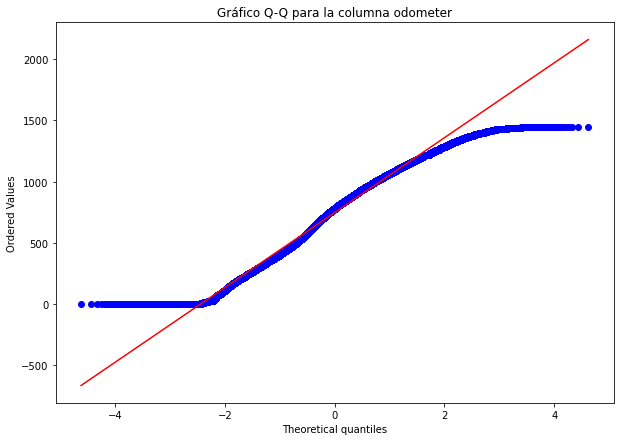

In [ ]:
# Imprimir histogramas
# columns_for_QQ: anteriormente definido

# Ciclo for para obtener los gráficos por columnas

for column_name in columns_for_QQ:
    print('*************************************************************************************')
    print('\n')
    create_QQ_graph_for_each_column(df=transf_df,
                                    column_name=column_name)
    print('\n')

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Házlo en una copia del dataframe a la que denominarás `minmax_df`.


6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente.

7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`.


9. Aplica codificación binaria a las variables en `highly_cardinal_variables`.

10. Concatena los dataframes obtenidos de las codificaciones anteriores al dataframe `minmax_df` (cuyas variables numéricas ya están transformadas) y elimina las columnas categóricas originales. Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.